In [1]:
import sys
sys.path.append('..')
import numpy as np
from dezero import *

In [2]:
rnn = RNN(10)
x = np.random.rand(1, 1)
h = rnn(x)
print(h.shape)

(1, 10)


In [3]:
class SimpleRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.rnn = L.RNN(hidden_size)
        self.fc = L.Linear(out_size)
        
    def reset_state(self):
        self.rnn.reset_state()
        
    def forward(self, x):
        h = self.rnn(x)
        return self.fc(h)

In [4]:
seq_data = [np.random.randn(1, 1) for _ in range(1000)]
xs = seq_data[0:-1]
ts = seq_data[1:]

model = SimpleRNN(10, 1)

loss, cnt = 0, 0
for x, t in zip(xs, ts):
    y = model(x)
    loss += F.mean_squared_error(y, t)
    
    cnt += 1
    
    if cnt == 2:
        model.cleargrads()
        loss.backward()
        break

In [5]:
print(x.data)

In [6]:
print(y.data)

[[-0.45154605]]


In [7]:
import matplotlib.pyplot as plt

train_set = datasets.SinCurve(train=True)
print(len(train_set))
print(train_set[0])

999
(array([-0.03841698]), array([0.04540898]))


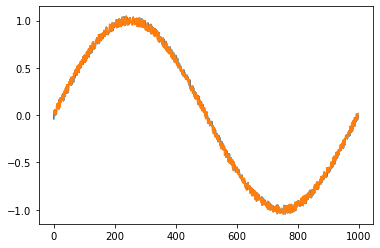

In [8]:
xs = [example[0] for example in train_set]
ts = [example[1] for example in train_set]

plt.plot(np.arange(len(xs)), xs, label='xs')
plt.plot(np.arange(len(ts)), ts, label='ts')
plt.show()

In [9]:
max_epoch = 100
hidden_size = 100
bptt_length = 30
train_set = datasets.SinCurve(train=True)
seqlen = len(train_set)

In [10]:
model = SimpleRNN(hidden_size, 1)
optimizer = optimizers.Adam().setup(model)

In [11]:
for epoch in range(max_epoch):
    model.reset_state()
    loss, count = 0, 0
    
    for x, t in train_set:
        x = x.reshape(1, 1)
        y = model(x)
        loss += F.mean_squared_error(y, t)
        count += 1
        
        if count % bptt_length == 0 or count == seqlen:
            model.cleargrads()
            loss.backward()
            loss.unchain_backward()
            optimizer.update()
            
    avg_loss = float(loss.data) / count
    print('epoch %d | loss %f' % (epoch + 1, avg_loss))

epoch 1 | loss 0.245914
epoch 2 | loss 0.045336
epoch 3 | loss 0.021748
epoch 4 | loss 0.013890
epoch 5 | loss 0.008643
epoch 6 | loss 0.004965
epoch 7 | loss 0.002635
epoch 8 | loss 0.002418
epoch 9 | loss 0.002013
epoch 10 | loss 0.002396
epoch 11 | loss 0.003392
epoch 12 | loss 0.005080
epoch 13 | loss 0.007043
epoch 14 | loss 0.007425
epoch 15 | loss 0.006046
epoch 16 | loss 0.005078
epoch 17 | loss 0.005110
epoch 18 | loss 0.005580
epoch 19 | loss 0.005866
epoch 20 | loss 0.005669
epoch 21 | loss 0.005248
epoch 22 | loss 0.004976
epoch 23 | loss 0.004933
epoch 24 | loss 0.005000
epoch 25 | loss 0.005052
epoch 26 | loss 0.005043
epoch 27 | loss 0.004999
epoch 28 | loss 0.004967
epoch 29 | loss 0.004972
epoch 30 | loss 0.005014
epoch 31 | loss 0.005082
epoch 32 | loss 0.005172
epoch 33 | loss 0.005289
epoch 34 | loss 0.005442
epoch 35 | loss 0.005649
epoch 36 | loss 0.005928
epoch 37 | loss 0.006309
epoch 38 | loss 0.006840
epoch 39 | loss 0.007602
epoch 40 | loss 0.008708
epoch 41 

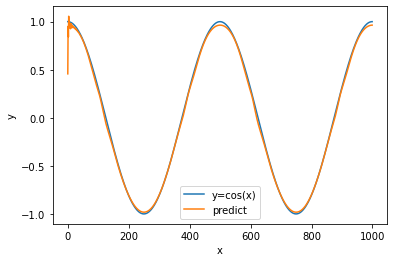

In [13]:
xs = np.cos(np.linspace(0, 4 * np.pi, 1000))
model.reset_state()
pred_list = []

import dezero

with dezero.no_grad():
    for x in xs:
        x = np.array(x).reshape(1, 1)
        y = model(x)
        pred_list.append(float(y.data))
        
plt.plot(np.arange(len(xs)), xs, label='y=cos(x)')
plt.plot(np.arange(len(xs)), pred_list, label='predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()